In [2]:
# Notebook to read in to the results of AiZynthFinders and parse reaction trees to json for further analysis

In [1]:
import pandas as pd
import json
import sys

sys.path.append('../../')

In [3]:
#import aizynthfinder.chem as chem
import aizynthfinder.analysis

from aizynthfinder.mcts.node import Node
from aizynthfinder.analysis import ReactionTree
from aizynthfinder.mcts.state import State
from aizynthfinder.chem import TreeMolecule
from aizynthfinder.context.collection import ContextCollection
from aizynthfinder.context.stock import StockException

In [1]:
import pandas as pd

data = pd.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_explore_1.hdf5', 'table')

In [9]:
data2 = pd.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_explore_1.hdf5', 'table')

In [5]:
print(data.head)

<bound method NDFrame.head of                                                target  search_time  \
0     O=S(=O)(NCC(c1ccco1)N1CCN(c2ccccc2)CC1)c1ccccc1    81.547154   
1        Cc1ccc(C(CNS(=O)(=O)c2ccccc2)N2CCN(C)CC2)cc1   116.712183   
2       O=S(=O)(NCC(c1ccccc1)N1CCCCCC1)c1ccc(F)c(F)c1   120.173156   
3   CCCS(=O)(=O)c1ccc(C(CNS(=O)(=O)c2ccc(C(F)(F)F)...   112.410574   
4    Cc1ccc(S(=O)(=O)NCC(c2ccccc2)N2CCN(CCC#N)CC2)cc1   116.261097   
..                                                ...          ...   
12  O=S(=O)(NCC(c1cccnc1)N1CCN(Cc2ccccc2)CC1)c1ccc...    70.618498   
13                c1ccc(C[C@@H](c2ccccc2)N2CCCCC2)cc1    40.119433   
14            O=S(=O)(NCC(c1ccccc1)N1CCCCCC1)c1cccnc1   117.678594   
15     O=S(=O)(NCC(c1ccccc1)N1CCCCCC1)c1ccc(F)c(Cl)c1   120.622877   
16  NS(=O)(=O)c1ccc(C(CNS(=O)(=O)c2ccc(C(F)(F)F)cc...   120.473612   

    number_of_nodes  max_transforms  max_children  number_of_leafs  \
0               735               7            46          

In [5]:
solved_data = data.loc[(data.is_solved==True)]
unsolved_data = data.loc[(data.is_solved==False)]
all_solved = data.is_solved.values

In [12]:
solved_data2 = data2.loc[(data2.is_solved==True)]
print(len(solved_data2))
print(len(solved_data))


88
88


In [6]:
true = []
false = []

for i in range(len(all_solved)):
    if all_solved[i] == True:
        true.append(i)
    else:
        false.append(i)


In [8]:
print('True:', (len(true)/len(all_solved))*100)
print('False: ', (len(false)/len(all_solved))*100)

True: 98.87640449438202
False:  1.1235955056179776


<function matplotlib.pyplot.show(close=None, block=None)>

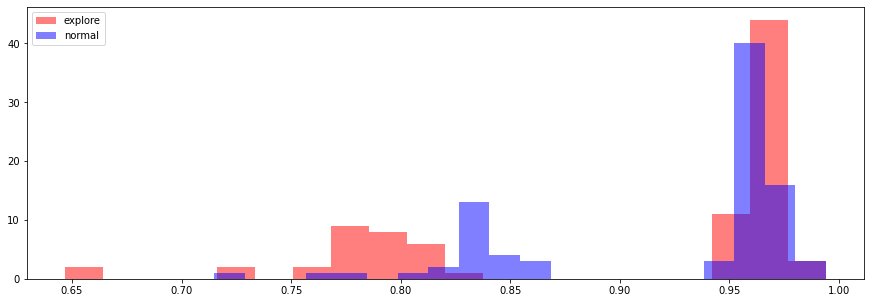

In [57]:
import numpy as np 
import matplotlib.pyplot as plt
top_scores = solved_data.top_scores.values
top_scores2 = solved_data2.top_scores.values

ts = []
for i in top_scores:
    ts.append([float(s) for s in i.split(',')])
ts2 = []
for i in top_scores2:
    ts2.append([float(s) for s in i.split(',')])

lts = [i[-1] for i in ts]
lts2 = [i[-1] for i in ts2]



mts = [np.mean(i) for i in ts]
mts2 = [np.mean(i) for i in ts2]

y = np.array(mts) - np.array(mts2)
x = np.arange(len(mts))

plt.figure(figsize=(15, 5))
plt.plot(lts, color='r', alpha=0.5, bins=20, label='explore')
plt.plot(lts2, color='b', alpha=0.5, bins=20, label='normal')
plt.legend()
plt.show


[ 0.          0.          0.          0.01107578  0.02262871  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00748692  0.          0.          0.
  0.          0.          0.         -0.01903985  0.01155293  0.
 -0.01903985  0.01903985  0.01155293  0.01155293  0.         -0.01155293
 -0.01903985  0.01155293 -0.01155293  0.02262871 -0.04166856  0.03418164
 -0.01155293  0.01155293  0.          0.01155293  0.         -0.01903985
 -0.01155293  0.01155293  0.02310586 -0.01903985  0.01155293 -0.01155293
  0.01903985  0.01155293 -0.01155293  0.01155293  0.          0.
  0.          0.         -0.01155293  0.         -0.00748692  0.03059278
 -0.01155293  0.01155293 -0.02310586 -0.00748692  0.          0.
  0.02487637  0.          0.          0.          0.01155293  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00748692
  0.          0.01155293  0.01155293  0.  

<function matplotlib.pyplot.show(close=None, block=None)>

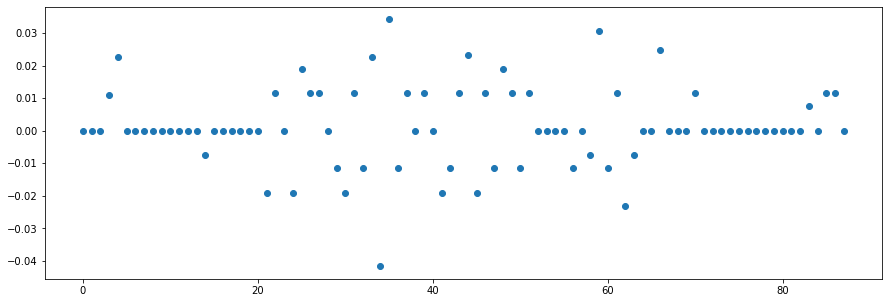

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

+
print(y)
x = np.arange(len(top_score))
print(x)

plt.figure(figsize=(15, 5))
plt.scatter(x,y)
plt.show




In [9]:
from aizynthfinder.analysis import ReactionTree

all_trees = data.trees.values
all_solved_trees = solved_data.trees.values
all_unsolved_trees = unsolved_data.trees.values
first_molecule_tree = all_trees[0]

#print(first_molecule_tree)



In [10]:
json_results = []
solved_json_results = []
unsolved_json_results = []

for i in all_trees:
    for itree, tree in enumerate(i):
        reaction_json = ReactionTree.from_dict(tree).to_json()
        json_results.append(reaction_json)

for i in all_unsolved_trees:
    for itree, tree in enumerate(i):
        unsolved_reaction_json = ReactionTree.from_dict(tree).to_json()
        unsolved_json_results.append(unsolved_reaction_json)

for i in all_solved_trees:
    for itree, tree in enumerate(i):
        solved_reaction_json = ReactionTree.from_dict(tree).to_json()
        solved_json_results.append(solved_reaction_json)



In [4]:
# save reaction trees to file

data = {
    'reaction trees': solved_json_results
}

with open('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_std_solved.json', 'w') as outfile:
    json.dump(data, outfile)

NameError: name 'solved_json_results' is not defined

In [22]:
print(solved_json_results[162])

{
  "type": "mol",
  "hide": false,
  "smiles": "N#CCCN1CCN(C(CNS(=O)(=O)c2ccc(Cl)cc2)c2ccccc2)CC1",
  "is_chemical": true,
  "in_stock": false,
  "children": [
    {
      "type": "reaction",
      "hide": false,
      "smiles": "[N:1]([CH3:2])[S:3](=[O:4])(=[O:5])[cH3:6]>>CC(C)(C)OC(=O)[N:1][CH3:2].Cl[S:3](=[O:4])(=[O:5])[cH3:6]",
      "is_reaction": true,
      "metadata": {
        "template_hash": "bc1d095dc7081f45b6bdc229834b860a4f4ac952689c2133081def18",
        "classification": "N-sulfonylation",
        "library_occurence": 22,
        "policy_probability": 0.00279999990016222,
        "policy_name": "uspto",
        "template_code": 34413
      },
      "children": [
        {
          "type": "mol",
          "hide": false,
          "smiles": "CC(C)(C)OC(=O)NCC(c1ccccc1)N1CCN(CCC#N)CC1",
          "is_chemical": true,
          "in_stock": false,
          "children": [
            {
              "type": "reaction",
              "hide": false,
              "smiles": "

In [14]:
print(len(solved_json_results))

545
